In [41]:
#Import Libraries
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [42]:
#Preprocess
transform = transforms.Compose([
    transforms.Resize((28, 28)),    # Resize images to 28x28
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize for grayscale; modify if 3 channels
])


In [43]:
#dataset
dataset = datasets.ImageFolder(root='C:/Users/srisa/Downloads/datasets/cnn_datasets/cnn_dataset', transform=transform)

In [44]:
#Load dataset
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

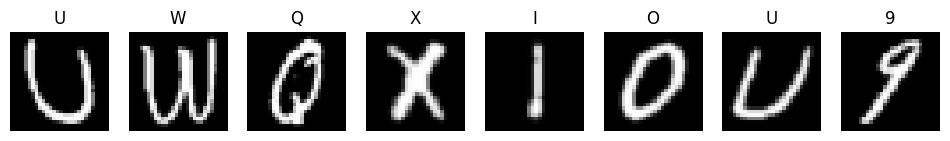

In [45]:
# visualize
def show_images(images, labels, classes):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 12))
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[i].imshow(img.permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Unnormalize
        axes[i].set_title(classes[label])
        axes[i].axis('off')
    plt.show()

# Get class names
classes = dataset.classes

# Visualize a batch of images
data_iter = iter(dataloader)
images, labels = next(data_iter)
show_images(images[:8], labels[:8], classes)


In [46]:
# Check data dimensions
print(f"Image shape: {images[0].shape}")
print(f"Labels batch: {labels[:8]}")


Image shape: torch.Size([3, 28, 28])
Labels batch: tensor([30, 32, 26, 33, 18, 24, 30,  9])


In [47]:
#Implement the VGG-13 
import torch
import torch.nn as nn

class VGG13(nn.Module):
    def __init__(self, num_classes):
        super(VGG13, self).__init__()
        
        # Layer 1 & 2 - First Conv Block
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Layer 3 & 4 - Second Conv Block
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Layer 5 & 6 - Third Conv Block
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Layer 7 & 8 - Fourth Conv Block
        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Layer 9 & 10 - Fifth Conv Block
        self.conv5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Fully Connected Layers
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 1 * 1, 4096),  # Adjusted for 28x28 input
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes)
        )
        
        # Initialize weights
        self._initialize_weights()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.classifier(x)
        return x
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

# Get the number of classes from your dataset
num_classes = len(dataset.classes)

# Create the model
model = VGG13(num_classes=num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print model summary
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model Parameters: {count_parameters(model):,}")

Model Parameters: 28,433,892


In [48]:
# Adjustments based on your dataset
import torch
import torch.nn as nn

class VGG13(nn.Module):
    def __init__(self, num_classes, input_size=28, in_channels=1):
        super(VGG13, self).__init__()
        
        self.input_size = input_size
        
        # Layer 1 & 2 - First Conv Block
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Layer 3 & 4 - Second Conv Block
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Layer 5 & 6 - Third Conv Block
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # Only apply MaxPool if input size is large enough
            nn.MaxPool2d(kernel_size=2, stride=2) if input_size >= 64 else nn.Identity()
        )
        
        # Layer 7 & 8 - Fourth Conv Block
        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # Only apply MaxPool if input size is large enough
            nn.MaxPool2d(kernel_size=2, stride=2) if input_size >= 32 else nn.Identity()
        )
        
        # Layer 9 & 10 - Fifth Conv Block
        self.conv5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # Only apply MaxPool if input size is large enough
            nn.MaxPool2d(kernel_size=2, stride=2) if input_size >= 16 else nn.Identity()
        )
        
        # Calculate the size of the feature maps before the fully connected layers
        self._calculate_fc_input_dims()
        
        # Fully Connected Layers
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.fc_input_dims, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes)
        )
        
        # Initialize weights
        self._initialize_weights()
    
    def _calculate_fc_input_dims(self):
        # Calculate the dimensions after convolutions and pooling
        size = self.input_size
        # First two blocks always have pooling
        size = size // 4  # After conv1 and conv2 pools
        
        # Conditional pooling for remaining blocks
        if self.input_size >= 64:
            size = size // 2  # After conv3 pool
        if self.input_size >= 32:
            size = size // 2  # After conv4 pool
        if self.input_size >= 16:
            size = size // 2  # After conv5 pool
            
        self.fc_input_dims = 512 * size * size
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.classifier(x)
        return x
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

# Update the transformation to match the new input size
transform = transforms.Compose([
    transforms.Resize((224, 224)),    # Resize to standard VGG input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Get the number of classes from your dataset
num_classes = len(dataset.classes)

# Create the model with the desired input size
model = VGG13(
    num_classes=num_classes,
    input_size=224,  # You can change this to 28 if you want to keep original size
    in_channels=1    # 1 for grayscale, 3 for RGB
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print model summary
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model Parameters: {count_parameters(model):,}")

Model Parameters: 129,097,188


Epoch [1/3] Batch [100/2520] Loss: 3.586 Acc: 2.97%
Epoch [1/3] Batch [200/2520] Loss: 3.579 Acc: 3.12%
Epoch [1/3] Batch [300/2520] Loss: 3.330 Acc: 8.95%
Epoch [1/3] Batch [400/2520] Loss: 2.910 Acc: 18.70%
Epoch [1/3] Batch [500/2520] Loss: 2.529 Acc: 28.55%
Epoch [1/3] Batch [600/2520] Loss: 2.231 Acc: 36.10%
Epoch [1/3] Batch [700/2520] Loss: 2.007 Acc: 41.99%
Epoch [1/3] Batch [800/2520] Loss: 1.833 Acc: 46.66%
Epoch [1/3] Batch [900/2520] Loss: 1.689 Acc: 50.55%
Epoch [1/3] Batch [1000/2520] Loss: 1.574 Acc: 53.61%
Epoch [1/3] Batch [1100/2520] Loss: 1.479 Acc: 56.16%
Epoch [1/3] Batch [1200/2520] Loss: 1.393 Acc: 58.47%
Epoch [1/3] Batch [1300/2520] Loss: 1.317 Acc: 60.54%
Epoch [1/3] Batch [1400/2520] Loss: 1.252 Acc: 62.40%
Epoch [1/3] Batch [1500/2520] Loss: 1.196 Acc: 63.91%
Epoch [1/3] Batch [1600/2520] Loss: 1.148 Acc: 65.16%
Epoch [1/3] Batch [1700/2520] Loss: 1.104 Acc: 66.36%
Epoch [1/3] Batch [1800/2520] Loss: 1.064 Acc: 67.48%
Epoch [1/3] Batch [1900/2520] Loss: 1.02

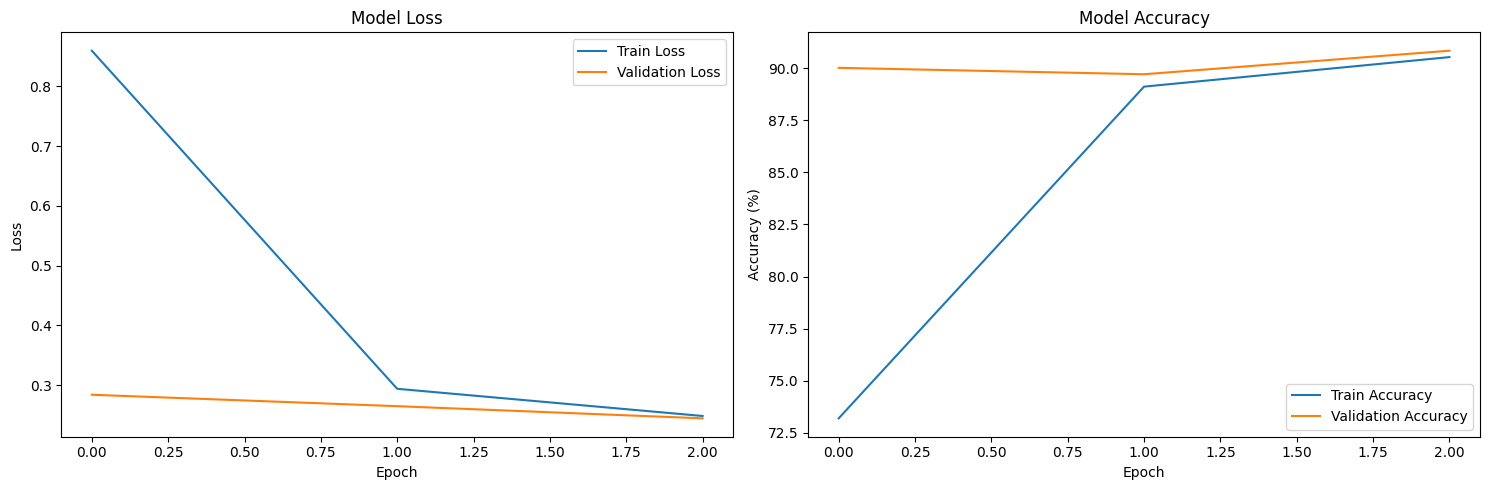

In [50]:
#Use the dropout and learning rate scheduler
#Takes lot of time
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import time

# Define the VGG13 model
class VGG13(nn.Module):
    def __init__(self, num_classes, input_size=28, in_channels=3):
        super(VGG13, self).__init__()
        
        self.input_size = input_size
        
        # Layer 1 & 2 - First Conv Block
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Layer 3 & 4 - Second Conv Block
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Layer 5 & 6 - Third Conv Block
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2) if input_size >= 64 else nn.Identity()
        )
        
        # Layer 7 & 8 - Fourth Conv Block
        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2) if input_size >= 32 else nn.Identity()
        )
        
        # Layer 9 & 10 - Fifth Conv Block
        self.conv5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2) if input_size >= 16 else nn.Identity()
        )
        
        # Calculate the size of feature maps before FC layers
        self._calculate_fc_input_dims()
        
        # Fully Connected Layers
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.fc_input_dims, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes)
        )
        
        self._initialize_weights()
    
    def _calculate_fc_input_dims(self):
        size = self.input_size
        size = size // 4  # After conv1 and conv2 pools
        if self.input_size >= 64:
            size = size // 2
        if self.input_size >= 32:
            size = size // 2
        if self.input_size >= 16:
            size = size // 2
        self.fc_input_dims = 512 * size * size
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.classifier(x)
        return x
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

# Training function
def train_model(model, train_loader, val_loader, num_epochs=3):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), 
                         lr=0.01,
                         momentum=0.9,
                         weight_decay=5e-4)
    
    scheduler = ReduceLROnPlateau(optimizer, 
                                 mode='min',
                                 factor=0.1,
                                 patience=3,
                                 verbose=True)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    best_val_loss = float('inf')
    
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    for epoch in range(num_epochs):
        start_time = time.time()
        
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            if (batch_idx + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}] '
                      f'Batch [{batch_idx + 1}/{len(train_loader)}] '
                      f'Loss: {running_loss / (batch_idx + 1):.3f} '
                      f'Acc: {100. * correct / total:.2f}%')
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += targets.size(0)
                val_correct += predicted.eq(targets).sum().item()
        
        val_loss = val_loss / len(val_loader)
        val_acc = 100. * val_correct / val_total
        
        scheduler.step(val_loss)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_vgg13_model.pth')
        
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        time_elapsed = time.time() - start_time
        print(f'\nEpoch {epoch + 1}/{num_epochs} completed in {time_elapsed:.2f}s')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%')
        print(f'Learning Rate: {optimizer.param_groups[0]["lr"]:.6f}\n')
    
    return model, history

# Testing function
def test_model(model, test_loader):
    model.eval()
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            test_total += targets.size(0)
            test_correct += predicted.eq(targets).sum().item()
    
    test_loss = test_loss / len(test_loader)
    test_acc = 100. * test_correct / test_total
    print(f'\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%')
    
    return test_loss, test_acc
    
# Plotting function
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ax2.plot(history['train_acc'], label='Train Accuracy')
    ax2.plot(history['val_acc'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Set up data transforms and loading
transform = transforms.Compose([
    transforms.Resize((28, 28)),    # or (224, 224) for standard VGG size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                       std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = datasets.ImageFolder(
    root='C:/Users/srisa/Downloads/datasets/cnn_datasets/cnn_dataset',
    transform=transform
)

# Split dataset
batch_size = 32
train_size = int(0.8 * len(dataset))
test_size = int(0.1 * len(dataset))
val_size = len(dataset) - train_size - test_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4
)

# Initialize model
num_classes = len(dataset.classes)
model = VGG13(
    num_classes=num_classes,
    input_size=28,  # or 224 for standard VGG size
    in_channels=3   # RGB images
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Train the model
model, history = train_model(model, train_loader, val_loader)
# Calculate test accuracy
test_loss, test_acc = test_model(model, test_loader)
# Plot training history
plot_training_history(history)

In [53]:
# Test function with additional metrics and timing
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
def test_model(model, test_loader):
    model.eval()
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    all_targets = []
    all_predictions = []
    
    criterion = nn.CrossEntropyLoss()
    
    # Start timing the testing phase
    start_testing_time = time.time()
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            test_total += targets.size(0)
            test_correct += predicted.eq(targets).sum().item()
            
            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    # End timing and calculate duration
    testing_time = time.time() - start_testing_time
    
    test_loss = test_loss / len(test_loader)
    test_acc = 100. * test_correct / test_total
    
    # Calculate precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_targets, all_predictions, average='weighted'
    )
    
    print(f'\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%')
    print(f'Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}')
    print(f'Testing Time: {testing_time:.2f} seconds')
    
    return test_loss, test_acc, precision, recall, f1, testing_time

# Train the model
#model, history, training_time = train_model(model, train_loader, val_loader)

# Calculate test accuracy, additional metrics, and testing time
test_loss, test_acc, precision, recall, f1, testing_time = test_model(model, test_loader)




Test Loss: 0.2590 | Test Accuracy: 90.34%
Precision: 0.9148 | Recall: 0.9034 | F1 Score: 0.9003
Testing Time: 115.12 seconds


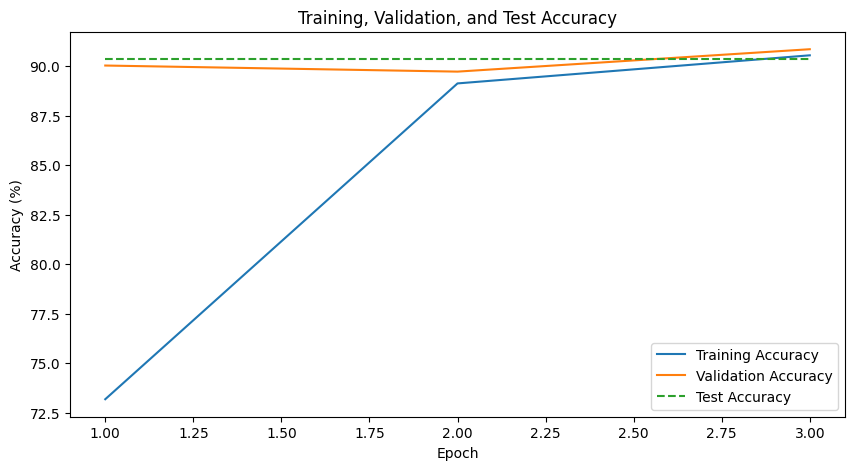

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Assuming 'history' holds training and validation accuracy/loss for each epoch
# 'test_acc' and 'test_loss' are single values for test accuracy and loss

epochs = len(history['train_loss'])
test_acc_line = [test_acc] * epochs
test_loss_line = [test_loss] * epochs

# a. Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), history['train_acc'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), history['val_acc'], label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_acc_line, label='Test Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()

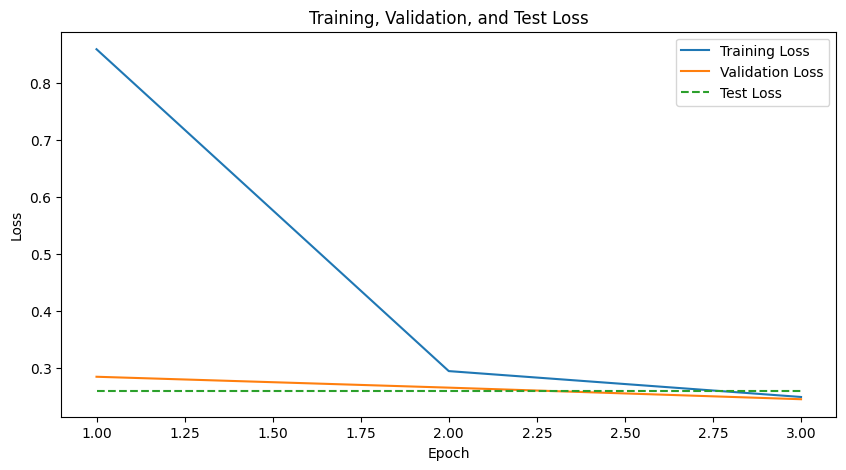

In [55]:
# b. Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), history['train_loss'], label='Training Loss')
plt.plot(range(1, epochs + 1), history['val_loss'], label='Validation Loss')
plt.plot(range(1, epochs + 1), test_loss_line, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

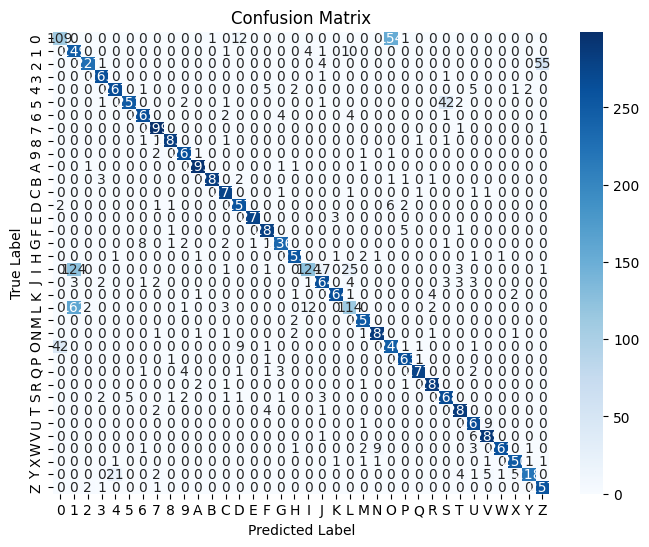

In [57]:
# c. Confusion Matrix
# Generate predictions on the test set
all_predictions = []
all_targets = []
model.eval()
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Confusion matrix
conf_matrix = confusion_matrix(all_targets, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

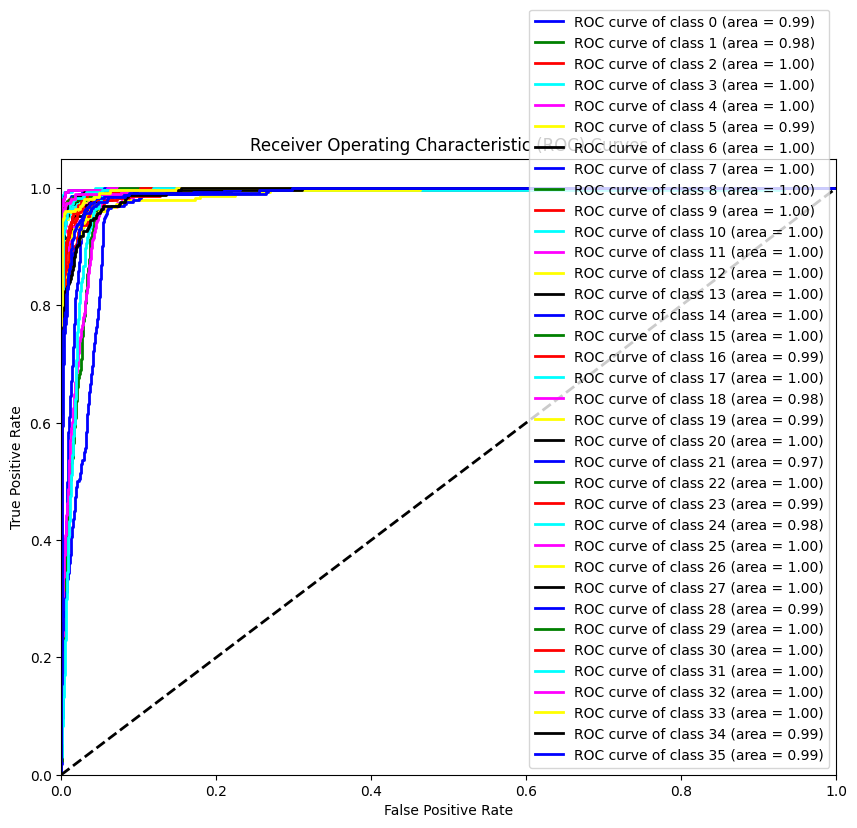

In [59]:
# d. ROC Curve
# Binarize the test labels for multi-class ROC curve
n_classes = len(dataset.classes)
y_test_binarized = label_binarize(all_targets, classes=range(n_classes))

# Generate probability scores for each class in test data
y_score = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        y_score.extend(outputs.cpu().numpy())

y_score = np.array(y_score)

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()